In [2]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup =  requests.get(url)
soup

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID Live - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<
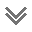

In [4]:
soup.text
#source code

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-ic
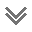

In [5]:
# XML LXML :Browser readable format
codes =  BeautifulSoup(soup.text,"lxml")
codes

In [7]:
table_code = codes.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [8]:
tags = table_code.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [33]:
list_data = []
for tag in tags:
    x = tag.text.split('\n')
    if x[1] != '':
        list_data.append(x[1:])
    
list_data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '103,081,401',
  '',
  '1,121,089                                ',
  '',
  '99,876,630',
  '',
  '2,083,682',
  '5,077',
  '307,885',
  '3,348',
  '1,155,402,577',
  '3,450,969',
  '334,805,269 ',
  'North America',
  '',
  '32990',
  '',
  '',
  '6,224',
  ''],
 ['2',
  'India',
  '44,681,017',
  '',
  '530,720                                ',
  '',
  '44,146,781',
  '',
  '3,516',
  '698',
  '31,765',
  '377',
  '911,951,216',
  '648,323',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6502',
  '',
  '',
  '2',
  ''],
 ['3',
  'France',
  '39,401,170',
  

In [34]:
import csv
file = open('covid.csv','w')
x = csv.writer(file)
x.writerows(list_data)
file.close()

In [35]:
pwd

'C:\\Users\\Riya\\Desktop\\python'

In [14]:
import pandas as pd 
df = pd.read_csv('covid.csv',encoding = 'ISO-8859-1')
df

#   Country,Other   TotalCases NewCases  \
0      1             USA  103,081,401      NaN   
1      2           India   44,681,017      NaN   
2      3          France   39,401,170      NaN   
3      4         Germany   37,509,539      NaN   
4      5          Brazil   36,500,341      NaN   
..   ...             ...          ...      ...   
226  227    Vatican City           29      NaN   
227  228  Western Sahara           10      NaN   
228  229      MS Zaandam            9      NaN   
229  230         Tokelau            5      NaN   
230  231           China      482,057      NaN   

                                   TotalDeaths  NewDeaths TotalRecovered  \
0    1,121,089                                        NaN     99,876,630   
1      530,720                                        NaN     44,146,781   
2      162,643                                        NaN     38,729,049   
3      162,688                                        NaN     36,831,800   
4      694,900                                        NaN     35,247,755   
..                                         ...        ...            ...   
226                                                   NaN             29   
227          1                                        NaN              9   
228          2                                        NaN              7   
229                                                   NaN            NaN   
230      5,267                                        NaN        376,105   

    NewRecovered ActiveCases Serious,Critical  ...     Tests/  \
0            NaN   2,083,682            5,077  ...  3,450,969   
1            NaN       3,516              698  ...    648,323   
2            NaN     509,478              869  ...  4,139,547   
3         +5,900     515,051            1,406  ...  1,458,359   
4            NaN     557,686            8,318  ...    296,146   
..           ...         ...              ...  ...        ...   
226          NaN           0              NaN  ...        NaN   
227          NaN           0              NaN  ...        NaN   
228          NaN           0              NaN  ...        NaN   
229          NaN           5              NaN  ...        NaN   
230          NaN     100,685            6,410  ...    110,461   

                                            1M pop        Unnamed: 15  \
0                                     334,805,269       North America   
1                                   1,406,631,776                Asia   
2                                      65,584,518              Europe   
3                                      83,883,596              Europe   
4                                     215,353,593       South America   
..                                             ...                ...   
226                                           799              Europe   
227                                       626,161              Africa   
228                                                               NaN   
229                                         1,378   Australia/Oceania   
230  1,448,471,400                                               Asia   

    Population      Continent  \
0          NaN          32990   
1          NaN       312,6502   
2          NaN          24030   
3          NaN          25161   
4          NaN          63103   
..         ...            ...   
226        NaN             28   
227        NaN  62,616626,161   
228        NaN            NaN   
229        NaN            276   
230        NaN  3,005275,0099   

    1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl  New Cases/1M pop  \
0                                                  NaN                 NaN   
1                                                  NaN                 NaN   
2                                                  NaN                 NaN   
3                                                  NaN                 NaN   
4                                               

In [1]:
!pip install plotly==5.11.0



Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 15.3/15.3 MB 3.1 MB/s eta 0:00:00


In [7]:
total_cases = list(df['TotalCases'])
total_cases = list(map(lambda x:int(x.replace(',','')),total_cases))
total_cases

[103081401,
 44681017,
 39401170,
 37509539,
 36500341,
 30473569,
 29520600,
 25279682,
 24210131,
 21826982,
 17042722,
 13693478,
 11525711,
 11205520,
 9963697,
 9055191,
 8574631,
 7561808,
 7271010,
 6723201,
 6371116,
 6349971,
 5724215,
 5557941,
 5548487,
 5361352,
 5062734,
 5029908,
 4772813,
 4770244,
 4723919,
 4682234,
 4582935,
 4475268,
 4466331,
 4378213,
 4067170,
 4050050,
 3312085,
 3169858,
 2755827,
 2683356,
 2465545,
 2452493,
 2207670,
 2188737,
 2117094,
 2037250,
 1859692,
 1809359,
 1746997,
 1693847,
 1575953,
 1476206,
 1446397,
 1404104,
 1313501,
 1293216,
 1290919,
 1271868,
 1265333,
 1223536,
 1211008,
 1171802,
 1168711,
 1147645,
 1112134,
 1047371,
 1040463,
 1025844,
 1020161,
 1007765,
 1001020,
 994037,
 974574,
 827190,
 826803,
 798231,
 699137,
 671927,
 662747,
 650990,
 634709,
 633713,
 621008,
 612432,
 596914,
 550740,
 515645,
 507153,
 498660,
 490493,
 480501,
 468048,
 445976,
 401083,
 399154,
 345857,
 342598,
 335545,
 333916,
 32

In [15]:
total_rec = list(df['TotalRecovered'])[0:10]
total_recover = list(map(lambda x:int(x.replace(',','')),total_rec))
total_recover

[99876630,
 44146781,
 38729049,
 36831800,
 35247755,
 21257687,
 28358090,
 24688083,
 23874846,
 21245559]

In [16]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=df['Country,Other'][0:10], y=total_cases)])
fig.show()

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df['Country,Other'][0:10], values=total_cases)])
fig.show()


In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=df['Country,Other'][0:10], y=total_cases),
    go.Bar(name='Total Recovered', x=df['Country,Other'][0:10], y=total_recover)])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=df['Country,Other'][0:10], y=total_cases),
    go.Bar(name='Total Recovered', x=df['Country,Other'][0:10], y=total_recover)])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()